In [1]:
import pandas as pd 
import matplotlib as plt
import os
import psycopg2

# Identifying the top 10 handsets used by the customers

In [2]:
# Load dataset
df = pd.read_csv('..\data\Week1_challenge_data_source(CSV).csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Hello\AppData\Local\Temp\ipykernel_884\3804657477.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Week1_challenge_data_source(CSV).csv')


In [3]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [4]:
df.count()

Bearer Id                                   149010
Start                                       150000
Start ms                                    150000
End                                         150000
End ms                                      150000
Dur. (ms)                                   150000
IMSI                                        149431
MSISDN/Number                               148935
IMEI                                        149429
Last Location Name                          148848
Avg RTT DL (ms)                             122172
Avg RTT UL (ms)                             122189
Avg Bearer TP DL (kbps)                     150000
Avg Bearer TP UL (kbps)                     150000
TCP DL Retrans. Vol (Bytes)                  61855
TCP UL Retrans. Vol (Bytes)                  53352
DL TP < 50 Kbps (%)                         149247
50 Kbps < DL TP < 250 Kbps (%)              149247
250 Kbps < DL TP < 1 Mbps (%)               149247
DL TP > 1 Mbps (%)             

In [5]:
handset_counts = df['Handset Type'].value_counts()

In [6]:
top_10_handsets = handset_counts.head(10)

In [7]:
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


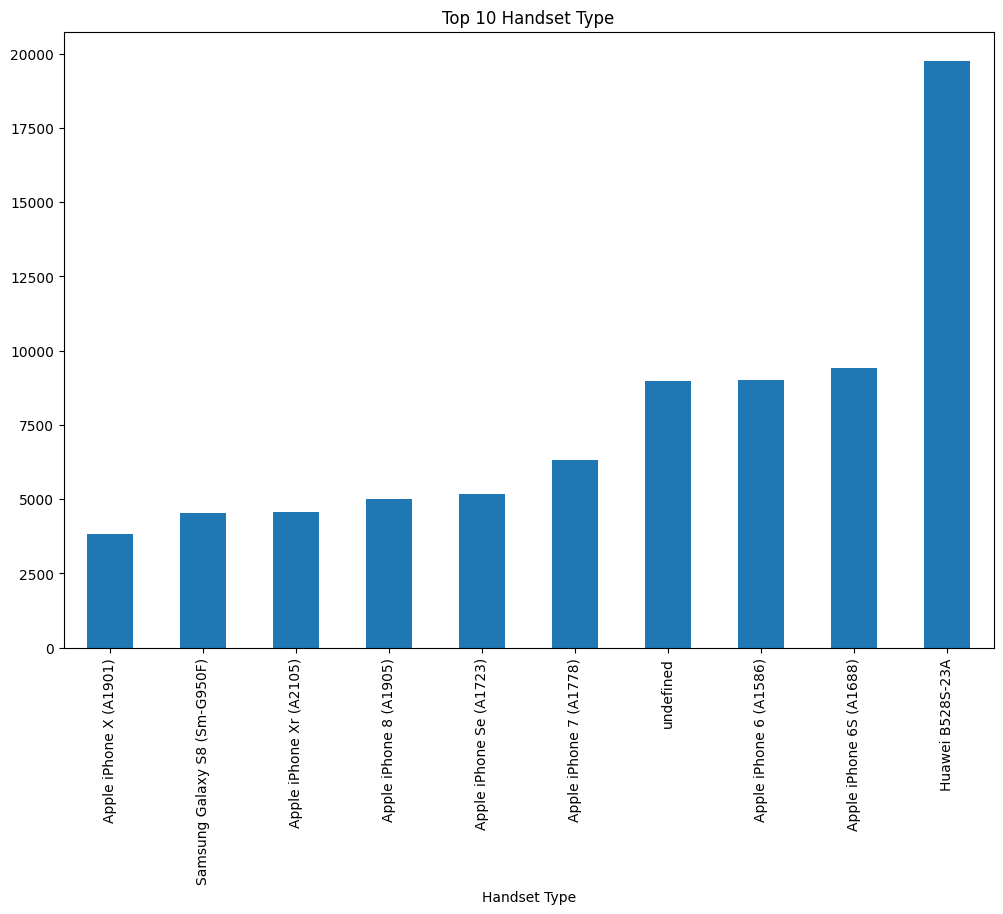

In [8]:
import matplotlib.pyplot as plt 

# Assuming top_10_handsets is a pandas DataFrame or Series
plt.figure(figsize=(12, 8))
top_10_handsets.plot(kind='bar', title='Top 10 Handset Type')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.show()

# Identify the top 3 handset manufacturers

In [9]:
handset_manufacturers_counts = df['Handset Manufacturer'].value_counts()

In [10]:
top_3_manufacturers = handset_manufacturers_counts.head(3)

In [11]:
print(top_3_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


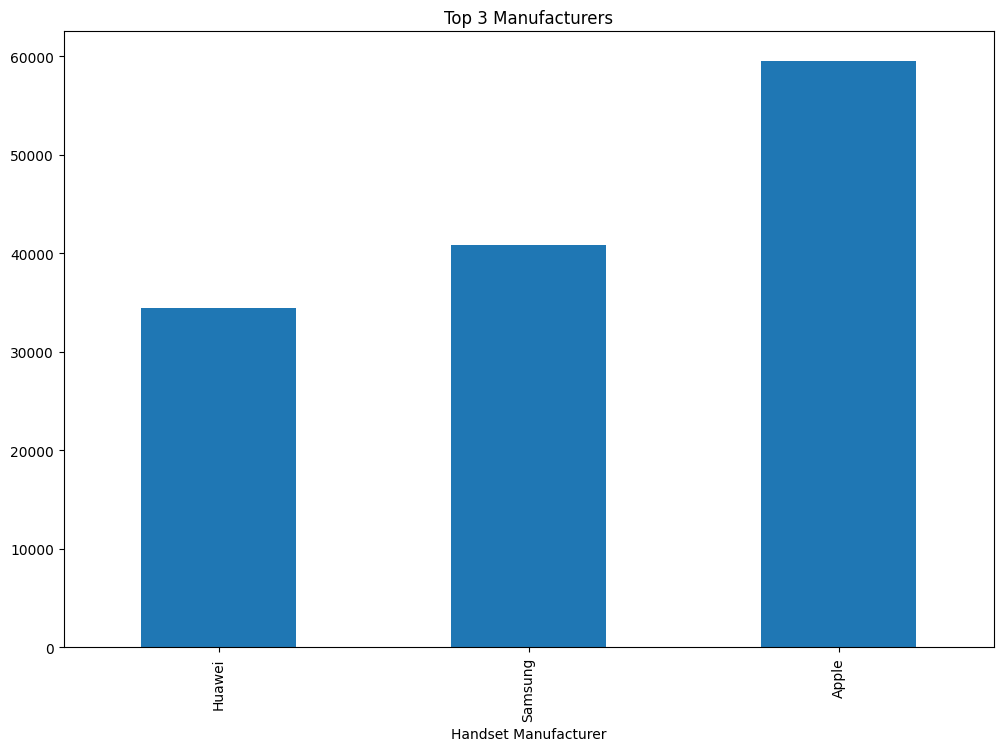

In [12]:
import matplotlib.pyplot as plt 

# Assuming top_10_handsets is a pandas DataFrame or Series
plt.figure(figsize=(12, 8))
top_3_manufacturers.plot(kind='bar', title='Top 3 Manufacturers')
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
plt.show() 

# Identify the top 5 handsets per top 3 handset manufacturer

In [13]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index

In [14]:
filtered_df = df[df['Handset Manufacturer'].isin(top_3_manufacturers)]

In [15]:
top_handsets_per_manufacturer = filtered_df.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

In [16]:
print(top_handsets_per_manufacturer)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: count, dtyp

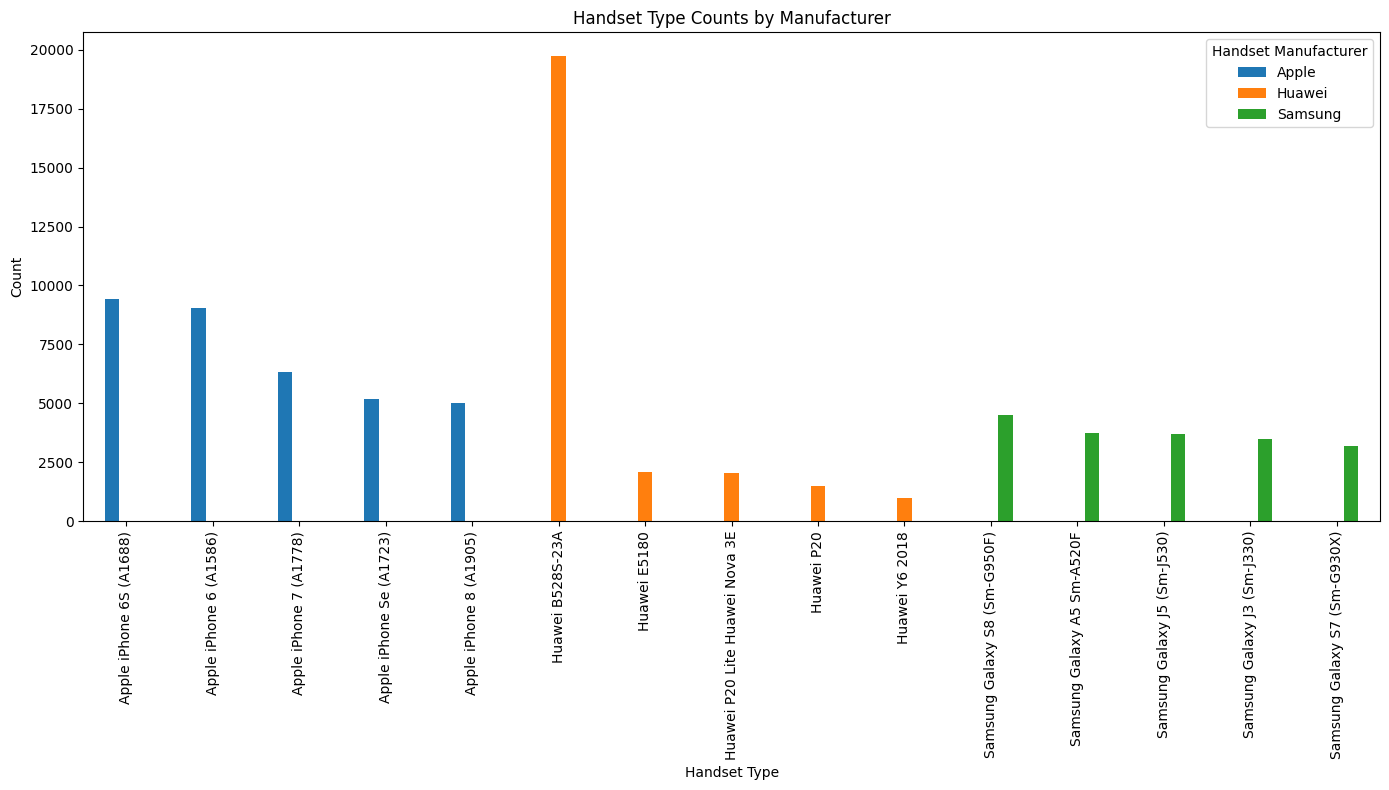

In [17]:
# Plotting the data
top_handsets_per_manufacturer.unstack(level=0).plot(kind='bar', figsize=(14, 8))  # Unstack the Manufacturer level to separate them in the plot

# Customizing the plot
plt.title('Handset Type Counts by Manufacturer')
plt.ylabel('Count')
plt.xlabel('Handset Type')
plt.xticks(rotation=90)  # Rotate x-axis labels to be vertical for better readability
plt.legend(title="Handset Manufacturer")
plt.tight_layout()  # Adjust layout to fit all elements

plt.show()

# Task 1.1

In [18]:
# Aggregate per user
aggregated_data = df.groupby('MSISDN/Number').agg(
    number_of_xDR_sessions=('Bearer Id', 'nunique'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_download_data=('Total DL (Bytes)', 'sum'),
    total_upload_data=('Total UL (Bytes)', 'sum'),
    total_data_volume=('Bearer Id', lambda x: df.loc[x.index, 'Social Media DL (Bytes)'].sum() + df.loc[x.index, 'Social Media UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Youtube DL (Bytes)'].sum() + df.loc[x.index, 'Youtube UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Netflix DL (Bytes)'].sum() + df.loc[x.index, 'Netflix UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Google DL (Bytes)'].sum() + df.loc[x.index, 'Google UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Email DL (Bytes)'].sum() + df.loc[x.index, 'Email UL (Bytes)'].sum() +
                       df.loc[x.index, 'Gaming DL (Bytes)'].sum() + df.loc[x.index, 'Gaming UL (Bytes)'].sum() + 
                       df.loc[x.index, 'Other DL (Bytes)'].sum() + df.loc[x.index, 'Other UL (Bytes)'].sum()
            )
)

In [19]:
# Reset the index to make 'MSISDN/Number' a column
aggregated_data = aggregated_data.reset_index()

In [20]:
aggregated_data

,MSISDN/Number,number_of_xDR_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume
0,3.360100e+10,1,116720.0,8.426375e+08,36053108.0,1.255788e+09
1,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,4.364173e+08
2,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,1.091053e+09
3,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.475687e+08
4,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,2.235055e+09
...,...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,6.879252e+08,26716429.0,1.006033e+09
106852,3.379000e+10,1,140988.0,4.445751e+08,35732243.0,6.849434e+08
106853,3.197021e+12,1,877385.0,1.948281e+08,37295915.0,6.998021e+08
106854,3.370000e+14,1,253030.0,5.396350e+08,56652839.0,7.406419e+08


In [21]:
# Display the result
print(aggregated_data.head(10))

   MSISDN/Number  number_of_xDR_sessions  total_session_duration  \
0   3.360100e+10                       1                116720.0   
1   3.360100e+10                       1                181230.0   
2   3.360100e+10                       1                134969.0   
3   3.360101e+10                       1                 49878.0   
4   3.360101e+10                       2                 37104.0   
5   3.360101e+10                       2                253983.0   
6   3.360101e+10                       2                128360.0   
7   3.360101e+10                       1                 86399.0   
8   3.360101e+10                       2                495702.0   
9   3.360102e+10                       1                124854.0   

   total_download_data  total_upload_data  total_data_volume  
0         8.426375e+08         36053108.0       1.255788e+09  
1         1.207552e+08         36104459.0       4.364173e+08  
2         5.566597e+08         39306820.0       1.091053e+09  

# Task-1.2

# Check if there is a null value

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL 

In [24]:
# Select only numeric columns for mean imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [25]:
# Calculate mean of numeric columns
mean_values = df[numeric_cols].mean()

In [26]:
# Replace missing values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(mean_values)

In [27]:
# Optionally, you can check if any missing values are left
missing_values_remaining = df.isnull().sum()
print("Missing values remaining per column:\n", missing_values_remaining)

Missing values remaining per column:
 Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)             

In [28]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

In [29]:
# Handle missing values in non-numeric columns
for col in non_numeric_cols:
    most_frequent = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
    df[col] = df[col].fillna(most_frequent)

In [30]:
# Optionally, you can check if any missing values are left
missing_values_remaining = df.isnull().sum()
print("Missing values remaining per column:\n", missing_values_remaining)

Missing values remaining per column:
 Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                       